# OpenCV

In [19]:
import cv2
cv2.__version__

'4.6.0'

In [2]:
img=cv2.imread('shm.jpg') # image 읽어오기
cv2.imshow('img',img) # img라는 이름의 창에 img 표시
cv2.waitKey(0) # 지정된 시간 동안 대기 (5000은 5초, 0은 계속)
cv2.destroyAllWindows() # 모든 창 닫기

# **[읽기 옵션]**

- cv2.IMREAD_COLOR : 컬러이미지 투명영역 무시
- cv2.IMREAD_GRAYSCALE : 흑백 이미지

In [4]:
img=cv2.imread('shm.jpg', cv2.IMREAD_COLOR)
cv2.imshow('img',img)
cv2.waitKey(0)

-1

In [5]:
img=cv2.imread('shm.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img',img)
cv2.waitKey(0)

-1

# **shape**

- 이미지의 height, width, chanel 정보 출력

In [9]:
img_1 = cv2.imread('shm.jpg')
img_1.shape

(512, 717, 3)

In [10]:
import cv2
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

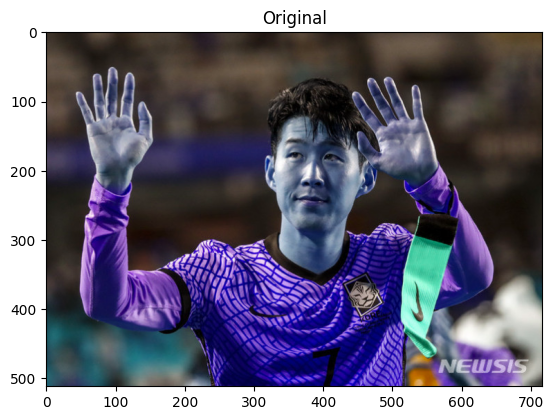

In [11]:
# BGR

img = cv2.imread('shm.jpg')
plt.imshow(img)
plt.title('Original')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

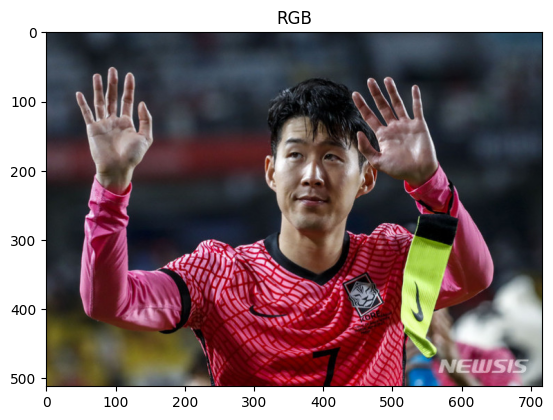

In [12]:
# RGB

rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.title('RGB')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

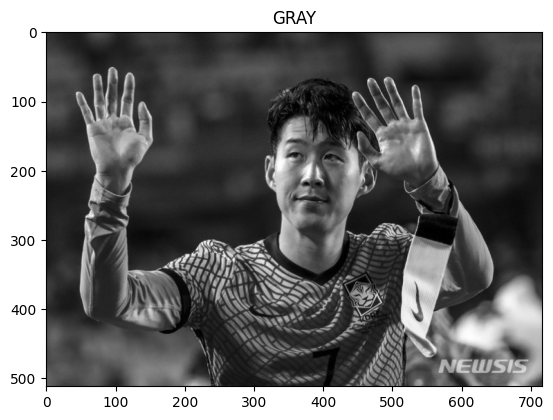

In [13]:
# GRAY

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.title('GRAY')
plt.show

Text(0.5, 1.0, 'Blur')

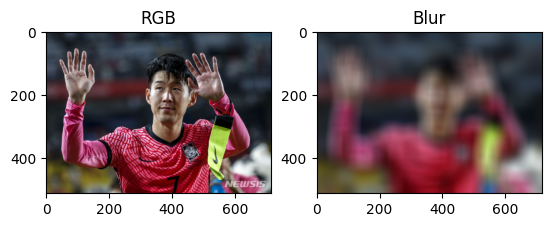

In [14]:
# blur

rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blur = cv2.blur(img,(50,50)) # (50,50)은 블러의 비율
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(rgb)
plt.title('RGB')
plt.subplot(122)
plt.imshow(blur)
plt.title('Blur')

# 이미지 속에 사람이 어디있는지 검출하기(HOG-SVM Detector)

In [31]:
import cv2

# 준비

hog = cv2.HOGDescriptor() # 객체
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) # 모델지정
hogParams = {'winStride' : (8,8), 'padding' : (32,32), 'scale' : 1.05, 'hitThreshold' : 0, 'finalThreshold' : 5} # 파라미터 설정

# 검출

img = cv2.imread('shm.jpg').copy() # 읽기
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 흑백변환
human, r = hog.detectMultiScale(gray, **hogParams) # 사람 검출 - human에는 사람의 위치정보가 들어감

if (len(human) > 0):
    for (x,y,w,h) in human:
        cv2.rectangle(img,(x,y),(x+w,y+h), (255,255,255), 3) # 사각형 그리기, (255,255,255)는 하얀색 선

cv2.imshow('img',img) # 출력
cv2.waitKey(0)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - 'finalThreshold' is an invalid keyword argument for HOGDescriptor.detectMultiScale()
>  - 'finalThreshold' is an invalid keyword argument for HOGDescriptor.detectMultiScale()


# OpenCV로 얼굴 인식하기

In [23]:
import cv2

# haarcascade 불러오기

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [24]:
# 이미지 불러오기

img = cv2.imread('shm.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [27]:
# 얼굴 찾기

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # 눈 찾기
    roi_color = img[y:y + h, x:x + w]
    roi_gray = gray[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


In [28]:
# 영상 출력

cv2.imshow('image', img)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Edge Detection')

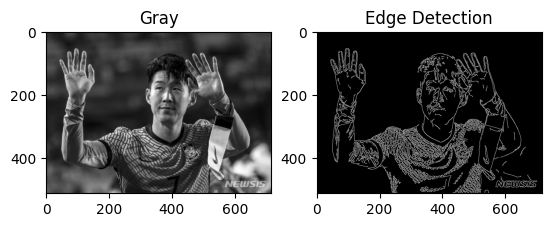

In [32]:
# EDGE DETECTION

edges = cv2.Canny(gray, 100, 200)
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Gray')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')

In [33]:
# 사각형 넣기

import numpy as np

img = np.zeros((384,384,3),np.uint8) # 검은색 바탕화면
img = cv2.rectangle(img,(10,10),(300,300),(255,0,0),3) # (객체, 왼쪽 위 꼭지점, 오른쪽 아래 꼭지점, 선 색깔, 두께)
cv2.imshow('rectangle', img)
cv2.waitKey(3000)
cv2.destroyAllWindows()

In [34]:
img = np.zeros((384,384,3),np.uint8) # 검은색 바탕화면
img = cv2.rectangle(img,(10,10),(100,100),(255,0,0),3) # (객체, 왼쪽 위 꼭지점, 오른쪽 아래 꼭지점, 선 색깔, 두께)
img = cv2.rectangle(img,(120,120),(200,200),(0,255,0),3)
img = cv2.rectangle(img,(220,220),(380,380),(0,0,255),3)
cv2.imshow('rectangle', img)
cv2.waitKey(3000)
cv2.destroyAllWindows()

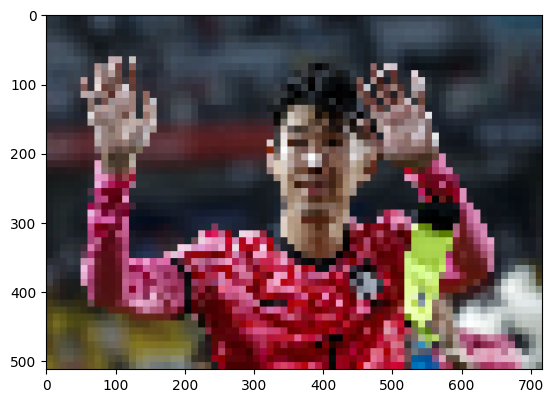

In [1]:
# 모자이크 처리하기

import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('shm.jpg')
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

def mosaic(src, ratio=0.1):
    small = cv2.resize(src, dsize=(0, 0),fx=0.1, fy=0.1, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

dst_01 = mosaic(src)
plt.imshow(dst_01)

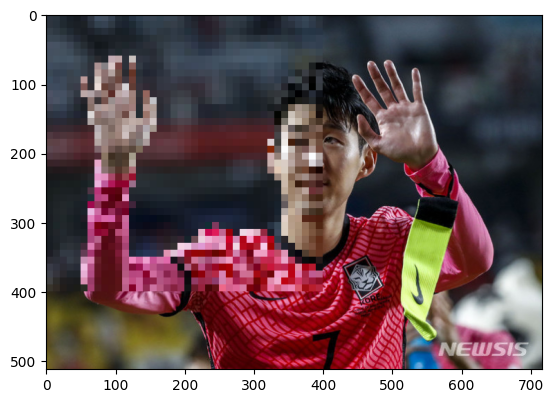

In [2]:
# 부분 모자이크 처리

import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('shm.jpg')
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

def mosaic_area(src, x, y, w, h, ratio=0.1):
    dst = src.copy()
    dst[y:y+h, x:x+h] = mosaic(dst[y:y+h, x:x+w], ratio)
    return dst

dst_area = mosaic_area(src,0,0,400,400)

plt.imshow(dst_area)

In [6]:
# 다중객체 모자이크 처리

import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('multi.jpg')
src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
dst = src.copy()

def mosaic(src, ratio=0.1):
    small = cv2.resize(src, dsize=(0, 0),fx=0.1, fy=0.1, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

def mosaic_area(src, x, y, w, h, ratio=0.1):
    dst[y:y+h, x:x+h] = mosaic(dst[y:y+h, x:x+w], ratio)
    return dst

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(src, 1.2, 5)

for (x, y, w, h) in faces:
    dst_area = mosaic_area(src,x,y,w,h)
    plt.imshow(dst_area)

print(f'Faces found : {len(faces)}')
cv2.imshow('mosaic',dst_area)

Faces found : 0


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('shm.jpg')
img = cv2.resize(img, dsize=(0, 0),fx=1, fy=1, interpolation=cv2.INTER_LINEAR)
cartoon_img = cv2.stylization(img, sigma_s=300, sigma_r=0.3)

cv2.imshow('cartoon',cartoon_img)
cv2.waitKey(0)

-1

NameError: name 'pandas' is not defined